In [2]:
import xarray as xr
import os
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import matplotlib.tri as tri
import numpy as np

In [12]:
collocated_datasets = []

for root, dirs, files in os.walk(".\data\model"):
    for name in files:
        file = os.path.join(root, name)
        print('loading dataset',file)
        data_temp = xr.load_dataset(file)
        data_temp = data_temp.assign_coords(lat=data_temp.lat1, lon=data_temp.lon1)
        collocated_datasets.append(data_temp)

atms_datasets = []
        
for root, dirs, files in os.walk("./data/atms"):
    for name in files:
        file = os.path.join(root, name)
        print('loading dataset',file)
        data_temp = xr.load_dataset(file)
        
        atms_datasets.append(data_temp)


loading dataset .\data\model\collocated_era5_atms_n20_20180614_00.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_03.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_06.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_09.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_12.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_15.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_18.nc
loading dataset .\data\model\collocated_era5_atms_n20_20180614_21.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_00.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_03.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_06.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_09.nc
loading dataset ./data/atms\atms_n20_v2_4_1_collocated_era5_atms_n20_20180614_12.nc
loading dataset ./data/atms\

In [43]:
atms_surface_contribution = xr.load_dataset('./data/atms_surface_contribution.nc')
atms_surface_contribution

<xarray.Dataset>
Dimensions:               (obs_id: 60048, level: 137, channel: 22)
Coordinates:
  * level                 (level) int64 0 1 2 3 4 5 ... 131 132 133 134 135 136
  * channel               (channel) int64 1 2 3 4 5 6 7 ... 16 17 18 19 20 21 22
    jd2                   (obs_id) float64 2.458e+06 2.458e+06 ... 2.458e+06
    lat2                  (obs_id) float64 -60.0 -60.0 -60.0 ... 41.25 41.25
    lon2                  (obs_id) float64 -73.35 -73.2 -72.0 ... -67.5 -64.65
Dimensions without coordinates: obs_id
Data variables: (12/40)
    time                  (obs_id) float64 2.458e+06 2.458e+06 ... 2.458e+06
    lon_orig              (obs_id) float64 286.7 286.7 288.0 ... 292.5 295.3
    lat_orig              (obs_id) float64 -60.69 -59.93 -60.72 ... 41.24 41.18
    OROGRAPHY             (obs_id) float64 5.68 1.29 0.09502 ... 0.7307 -0.893
    TSFC                  (obs_id) float64 275.7 276.8 274.1 ... 290.1 293.7
    lsm                   (obs_id) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ...                    ...
    zenith_angle          (obs_id) float64 64.15 64.15 62.43 ... 57.56 64.09
    azimuth_angle         (obs_id) float64 92.63 92.63 91.58 ... -93.49 -91.68
    obs                   (obs_id, channel) float64 152.3 157.2 ... 229.3 228.5
    scan_line             (obs_id) float64 225.0 225.0 ... 5.358e+03 4.997e+03
    fov1                  (obs_id) float64 1.0 1.0 2.0 3.0 ... 91.0 92.0 96.0
    surface_contribution  (obs_id, channel) float64 0.4333 0.4567 ... nan nan

In [30]:
channel_select = 16

lats = []
lons = []
values = []

for a, b in zip(collocated_datasets, atms_datasets):
    partial = a.obs - b.tb.squeeze("nScanAng").values.T
    lats.extend(partial.lat.values)
    lons.extend(partial.lon.values)
    values.extend(partial.sel(channel=channel_select).values)
    #print(partial.sel(channel=channel_select).values)


In [52]:
channel_select = 16

lats = atms_surface_contribution.lat1.values
lons = atms_surface_contribution.lon1.values
values = atms_surface_contribution.sel(channel=channel_select).surface_contribution.values

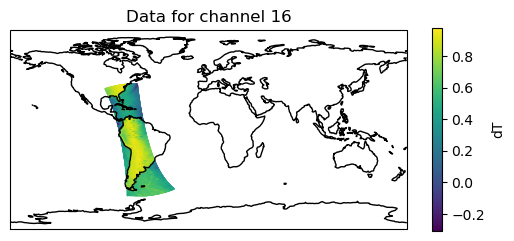

In [53]:
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_global()
ax.coastlines()
ax.set_title(f"Data for channel {channel_select}")

p = plt.scatter(lons, lats, s=0.05, c=values, transform=ccrs.PlateCarree())
plt.colorbar(p, ax=ax, label="dT", shrink=0.55)

plt.show()